In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("../data/student-mat.csv", sep=';')

print(df.columns)
print(df.head())

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6 

In [2]:
# Create binary target: 1 if G3 >= 10 (pass), else 0 (fail)
df['pass'] = (df['G3'] >= 10).astype(int)

# Drop G3 to avoid data leakage (optional: also drop G1, G2 for more challenge)
df = df.drop(columns=['G3'])

# One-hot encode categorical features (drop_first avoids multicollinearity)
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop(columns=['pass'])
y = df['pass']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (316, 41)
Test shape: (79, 41)


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate multiple models
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Naive Bayes Accuracy: 0.8228
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.85      0.88      0.87        52

    accuracy                           0.82        79
   macro avg       0.81      0.79      0.80        79
weighted avg       0.82      0.82      0.82        79


Decision Tree Accuracy: 0.8861
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79


KNN Accuracy: 0.8734
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.90      0.90      0.90        52

    accuracy                           0.87        79
   macro avg       0.86      0.86      0.86 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))


Random Forest Accuracy: 0.9240506329113924
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.93        79

XGBoost Accuracy: 0.8734177215189873
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.92      0.88      0.90        52

    accuracy                           0.87        79
   macro avg       0.86      0.87      0.86        79
weighted avg       0.88      0.87      0.87        79



c:\Users\RJ\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:09:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


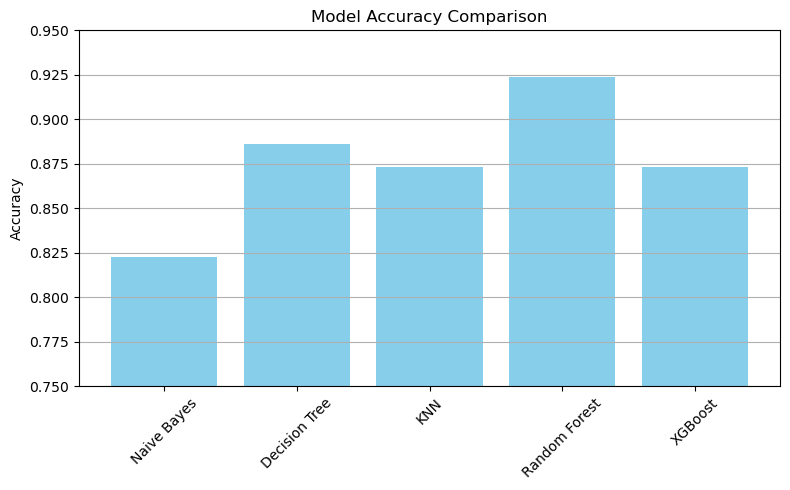

In [5]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracies = {
    'Naive Bayes': 0.8228,
    'Decision Tree': 0.8861,
    'KNN': 0.8734,
    'Random Forest': accuracy_score(y_test, rf_preds),
    'XGBoost': accuracy_score(y_test, xgb_preds)
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.75, 0.95)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


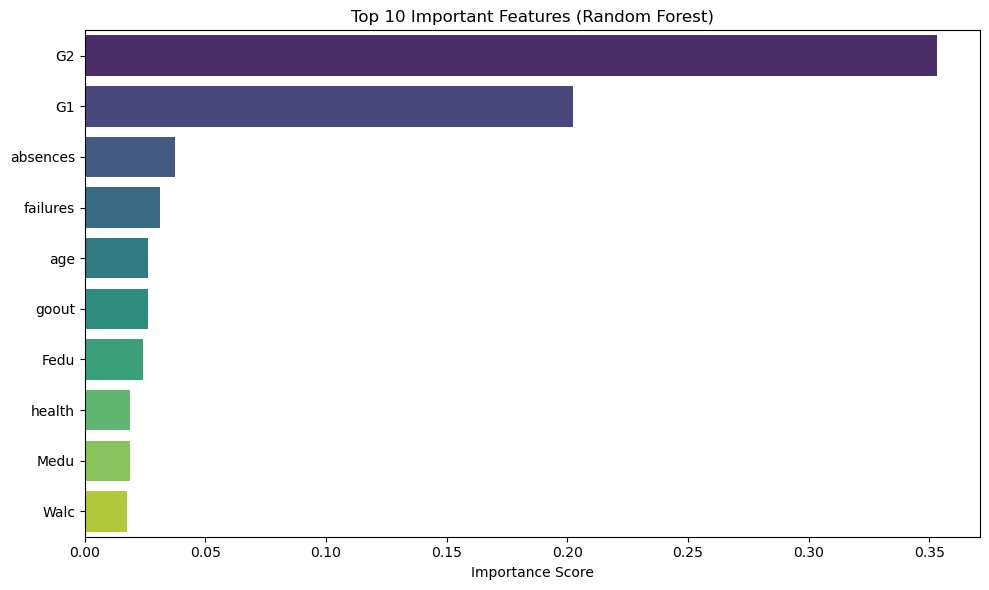

In [6]:
import pandas as pd
import seaborn as sns

# Feature importances from Random Forest
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [7]:
import pickle

# Assuming your trained model is called `rf_model`
with open('student_performance_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [8]:
import pickle

# Save expected column order
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)


In [1]:
import sklearn
print(sklearn.__version__)


1.2.2
